In [4]:
import pandas as pd
import scipy
import numpy as np 
import os #cwd tools 
import matplotlib.mlab as mlab
import seaborn as sns
from astropy.stats import sigma_clip
from matplotlib import pyplot as plt 
from scipy.optimize import curve_fit
from scipy import stats
from astropy.io import fits #allows python to interpurt fits data files 
from glob import glob # Unix style pathname pattern expansion

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import norm

%matplotlib inline
sns.set()

In [2]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (30, 20)
plt.rcParams["font.family"] = "Times New Roman"

params = {'axes.labelsize': 30,'axes.titlesize':30,  'legend.fontsize': 22, 'xtick.labelsize': 30, 'ytick.labelsize': 30}
plt.rcParams.update(params)


In [3]:
def master_sigma(name, a, b, x, y, std): 
    
    files = glob(name)
    
    #defining arrays and variables 
    all_data = []
    i = 0 
    
    while i < len(files):
        # using a loop to obtain data for all pixels 
        pixel_data = fits.open(files[i])[0].data[a:b, x:y]
        all_data.append(pixel_data)
        i += 1
        
    all_data_array = np.asarray(all_data)
    print(np.shape(all_data_array))
    
    all_data_transposed = np.concatenate(np.swapaxes((all_data_array), 0, 2)) #transposing data to sigma clip
    
    i = 0 #resetting counter 
    clipped_data = []

    while i < len(all_data_transposed):
        clipped_data.append(sigma_clip(all_data_transposed[i], sigma = std))
        i +=1
        
    clipped_data_transposed = np.asarray(clipped_data)
   
    clipped_data_3D = np.swapaxes(np.array_split(clipped_data_transposed, len(all_data_array[0][1])), 2, 0)
    print(np.shape(clipped_data_3D))
    
    nonzero = np.nonzero(clipped_data_3D == 0)
    count = np.count_nonzero(nonzero)
    print(count) #counts number of clipped pixel in sample set 
    
    
    
    return np.average(clipped_data_3D, axis = 0)    

(10, 100, 100)
(10, 100, 100)
0


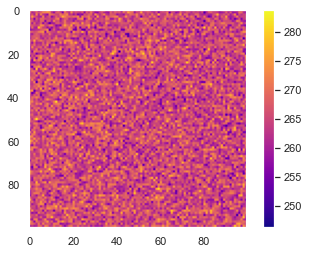

In [5]:
os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\1. Dark_Currents_n8\exp_5')
test = master_sigma("dark_single*", 646, 746, 470, 570, 3)

# --- Plot Parameters --- 

plt.imshow(test, cmap = 'plasma')
# plt.clim(2500, 3000)
plt.grid()
plt.colorbar()
plt.savefig('master_dark.png', dpi = 300)

In [36]:

def master_array(name, a, b, x, y):
    filelst = glob(name)
    
    mean_array = []
    std_array = [] 
    temp_array = []
    array = []
    
    for file in filelst: 
        
        image = fits.open(file)
        
        mean = (image[0].data[a:b, x:y]).mean()
        mean_array.append(mean)
        
        std = (image[0].data[a:b, x:y]).std()
        std_array.append(std)
            
        temp = image[0].header['CCD-TEMP']
        temp_array.append(temp)

    return mean_array, std_array, temp_array 


In [40]:
os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\1. Dark Currents\1. Dark_Currents_n8\exp_5')
test2 = master_sigma("dark_single*", 646, 746, 470, 570, 0)

(10, 100, 100)
(10, 100, 100)
0


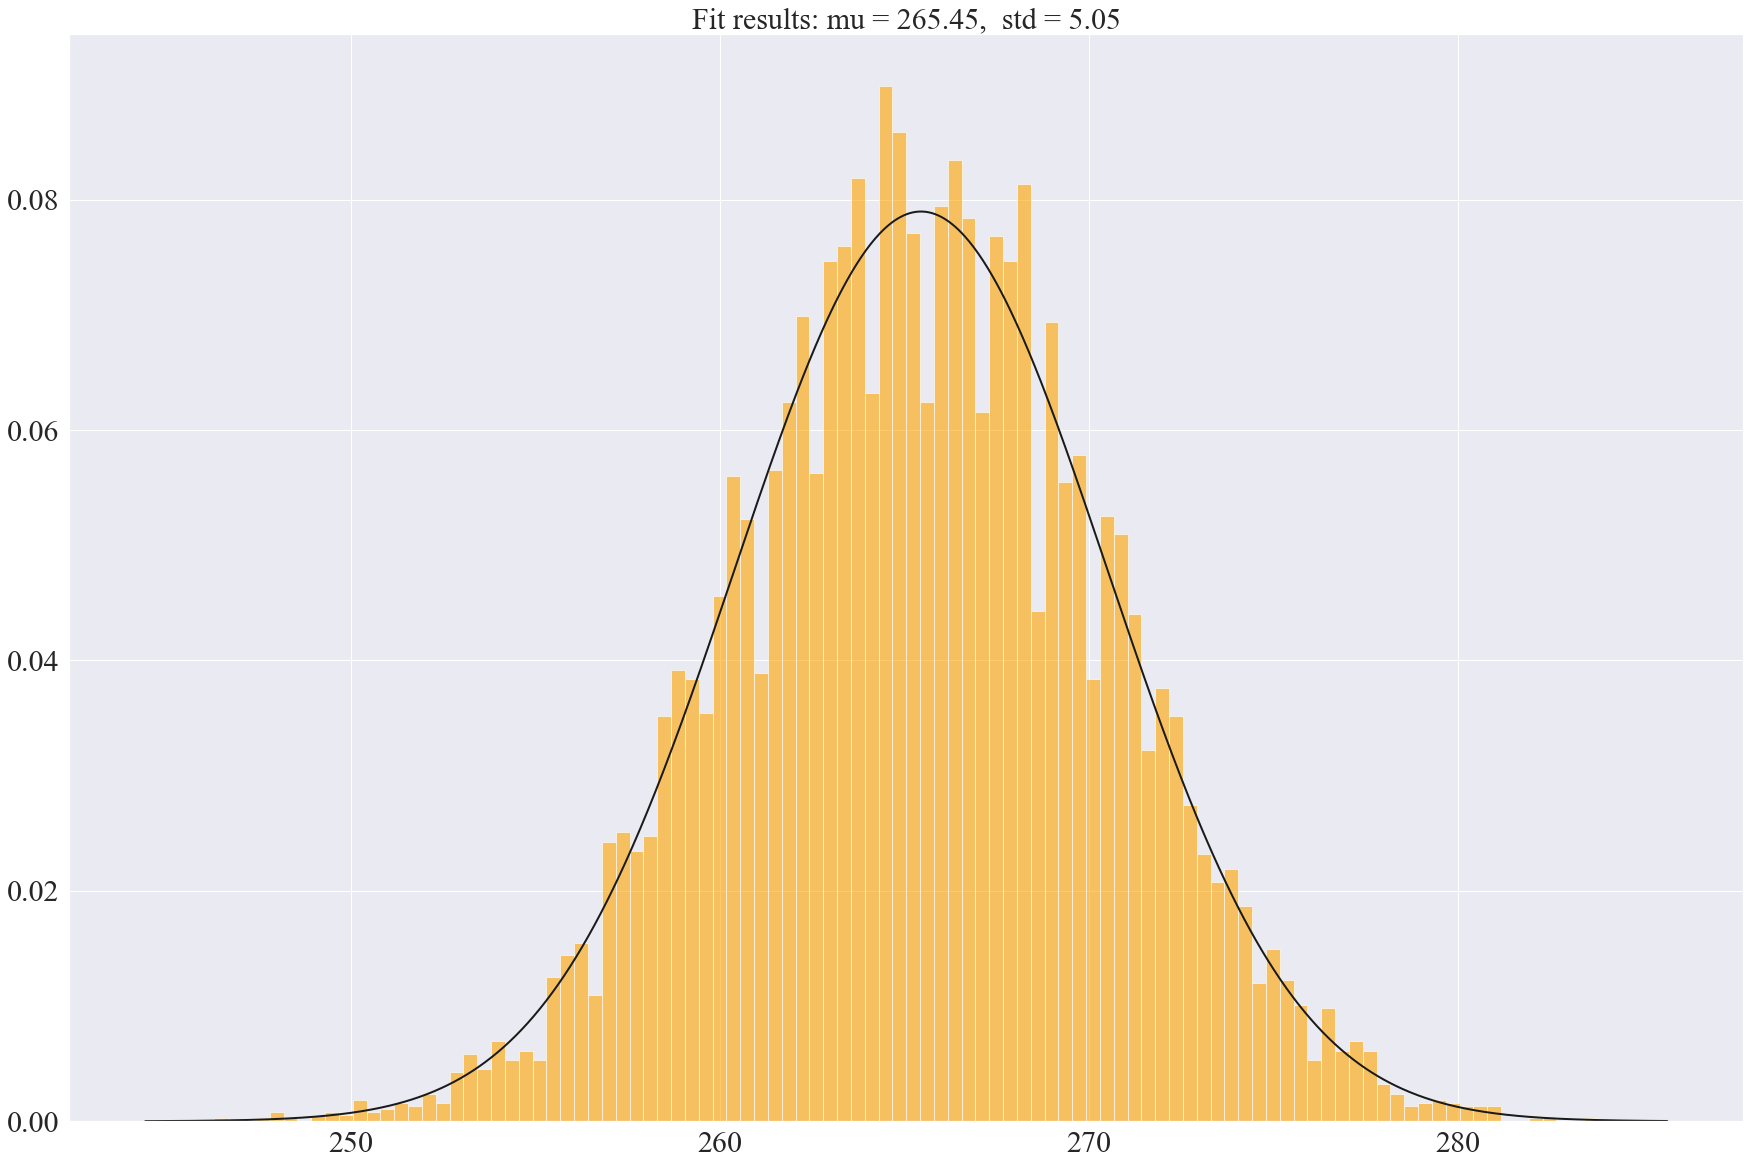

In [42]:
# Fit a normal distribution to the data:
mu, std = stats.norm.fit(test2.flatten())

# Plot the histogram.
plt.hist(test2.flatten(), bins= 100, density=True, alpha=0.6, color='orange')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [11]:
%%time
os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\2. Bias\bias_ntp_day2')
bias_master_clip = master_sigma('bias_ntp_*', 0, 1039, 0, 1391, 3)

(300, 1039, 1391)
(300, 1039, 1391)
0
Wall time: 4min 47s


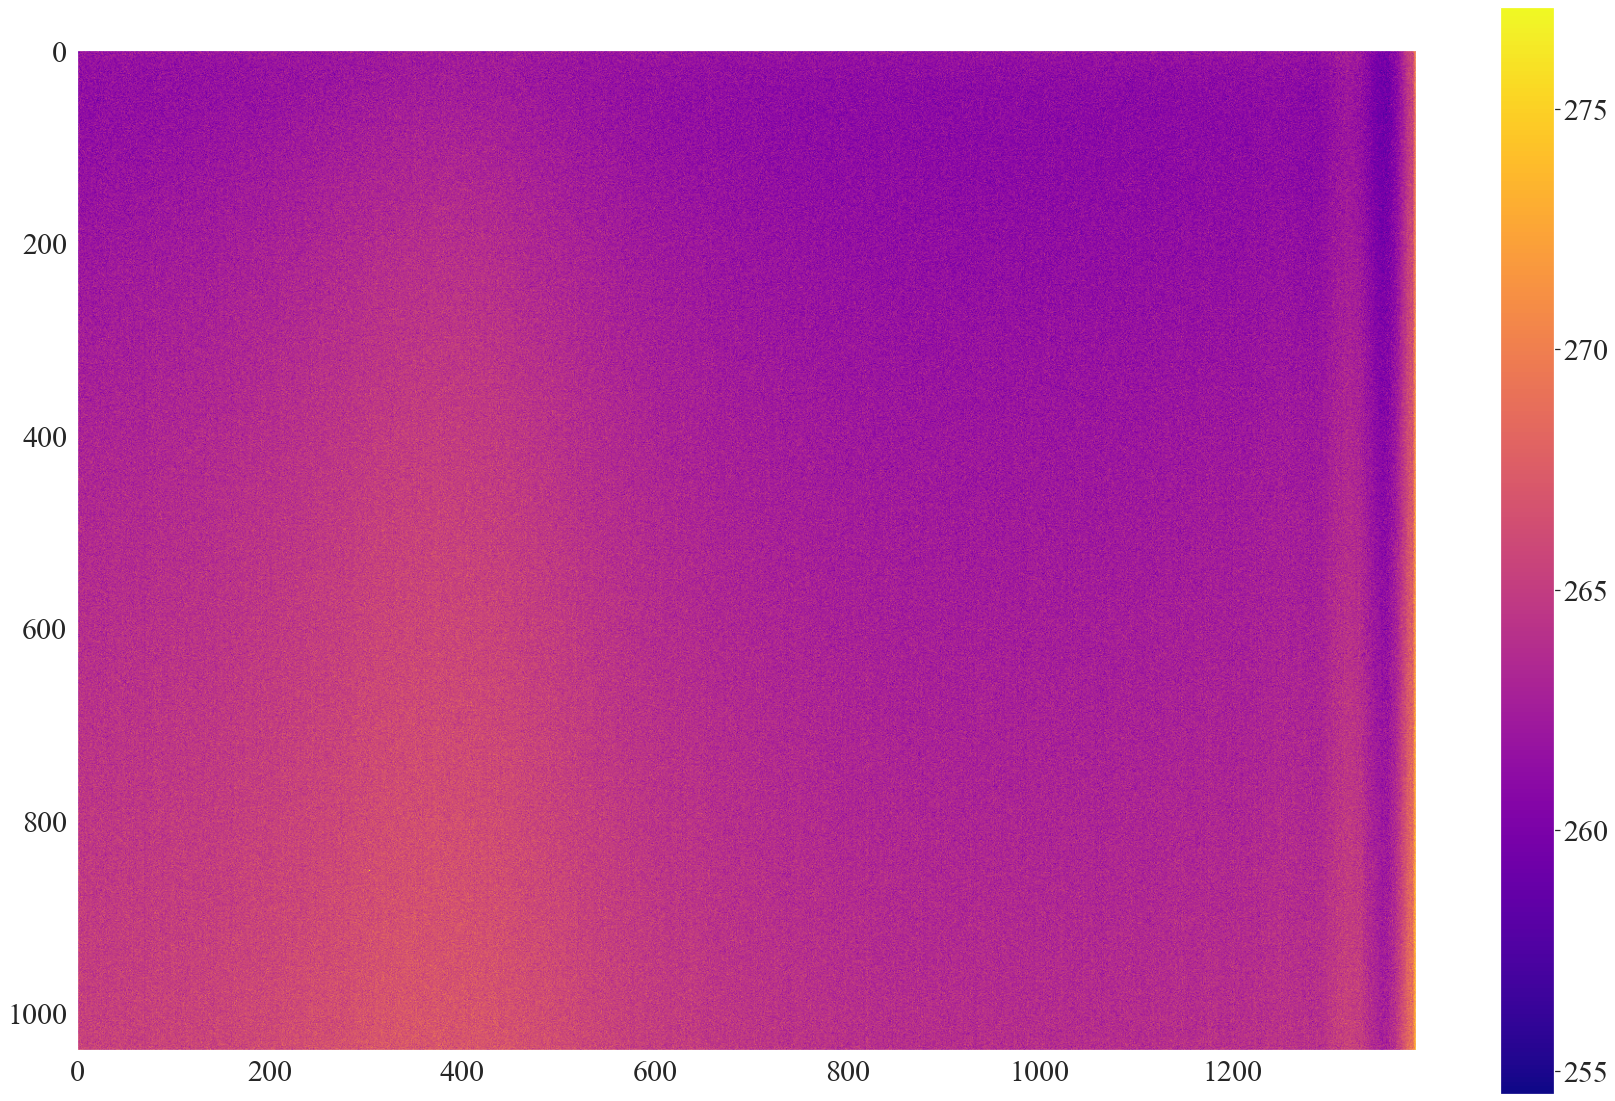

In [18]:


# --- Plot Parameters --- 

plt.imshow(bias_master_clip, cmap = 'plasma')
# plt.clim(2500, 3000)
# plt.title("Average Dark Frames taken at -7.8°C and 1s exposure. ")
plt.grid()
plt.colorbar()
plt.savefig('master_bias', dpi = 300)

In [63]:
%%time 
os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Data Collection\3. Flats\flat_ntp_2')
flat_master_clip = master_sigma("flat_*", 0, 500, 0, 500, 3) 

(100, 500, 500)
(100, 500, 500)
0
Wall time: 34.4 s


47729.440004200005 274.5780645176297


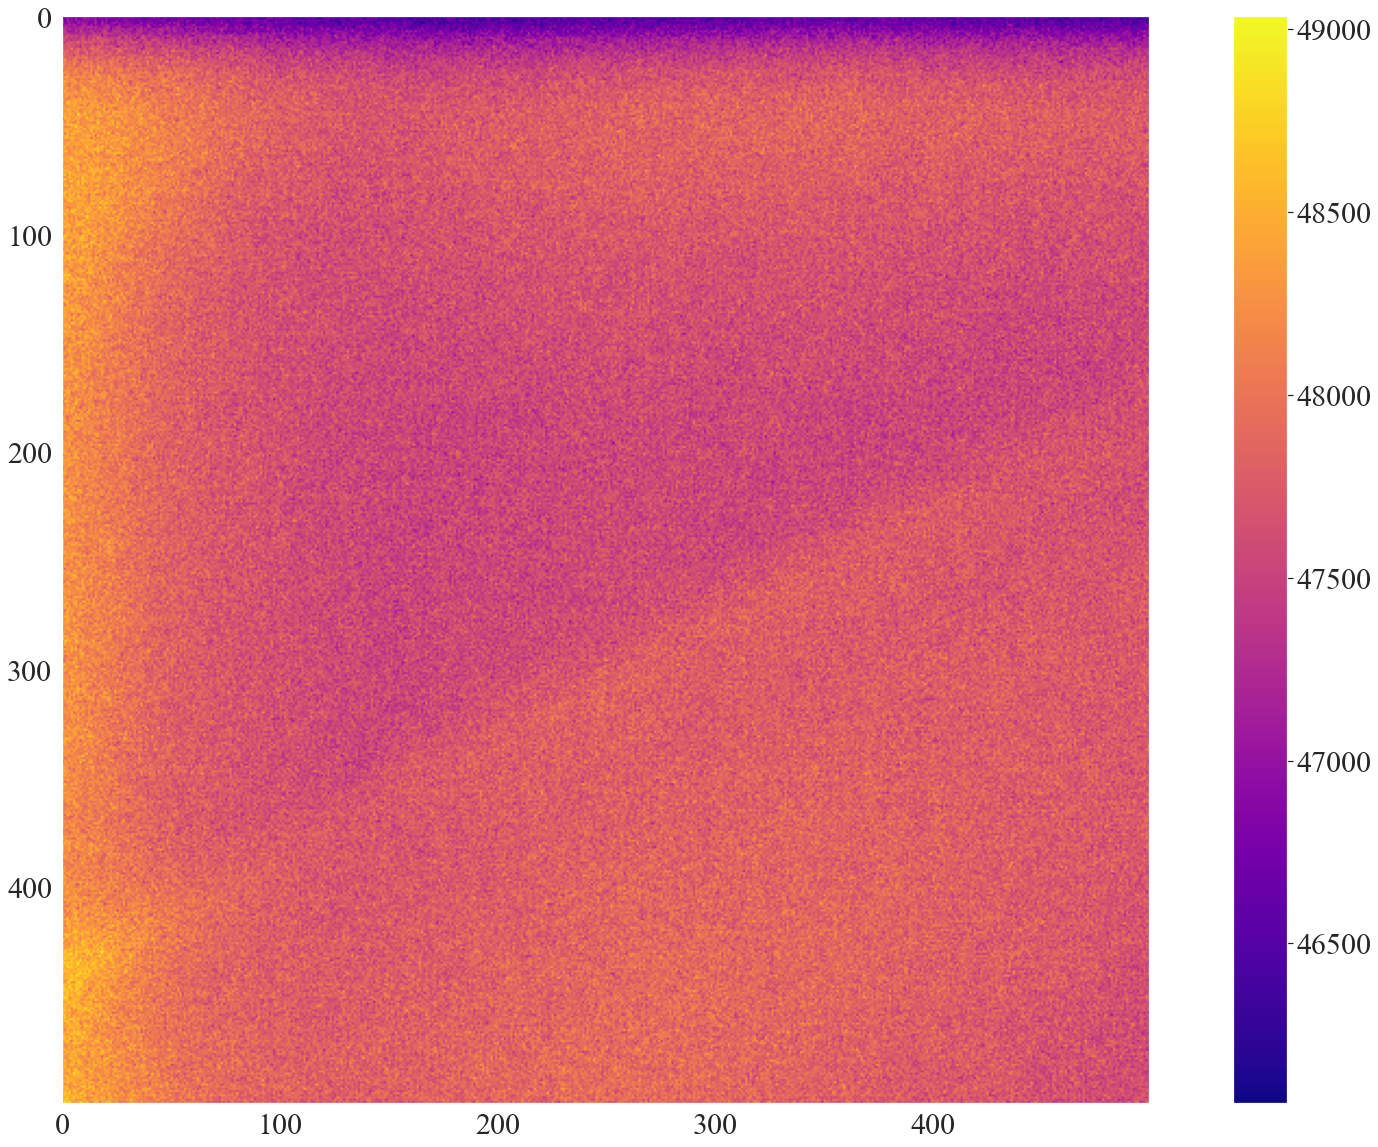

In [64]:
# print(type(flat_master_clip))
# print(flat_master_clip[0])

t = flat_master_clip

print(t.mean(), t.std())

# t = flat_master_clip - bias_master_clip
# t = np.flip(flat_master_clip, 0)
# print(t.mean())
# print(np.shape(t))
# print(t[0])

# --- Plot Parameters --- 

plt.imshow(t, cmap = 'plasma')
# plt.clim(2500, 3000)
# plt.title("Average Dark Frames taken at -7.8°C and 1s exposure. ")
plt.grid()
plt.colorbar()
plt.savefig('master_flat', dpi = 300)

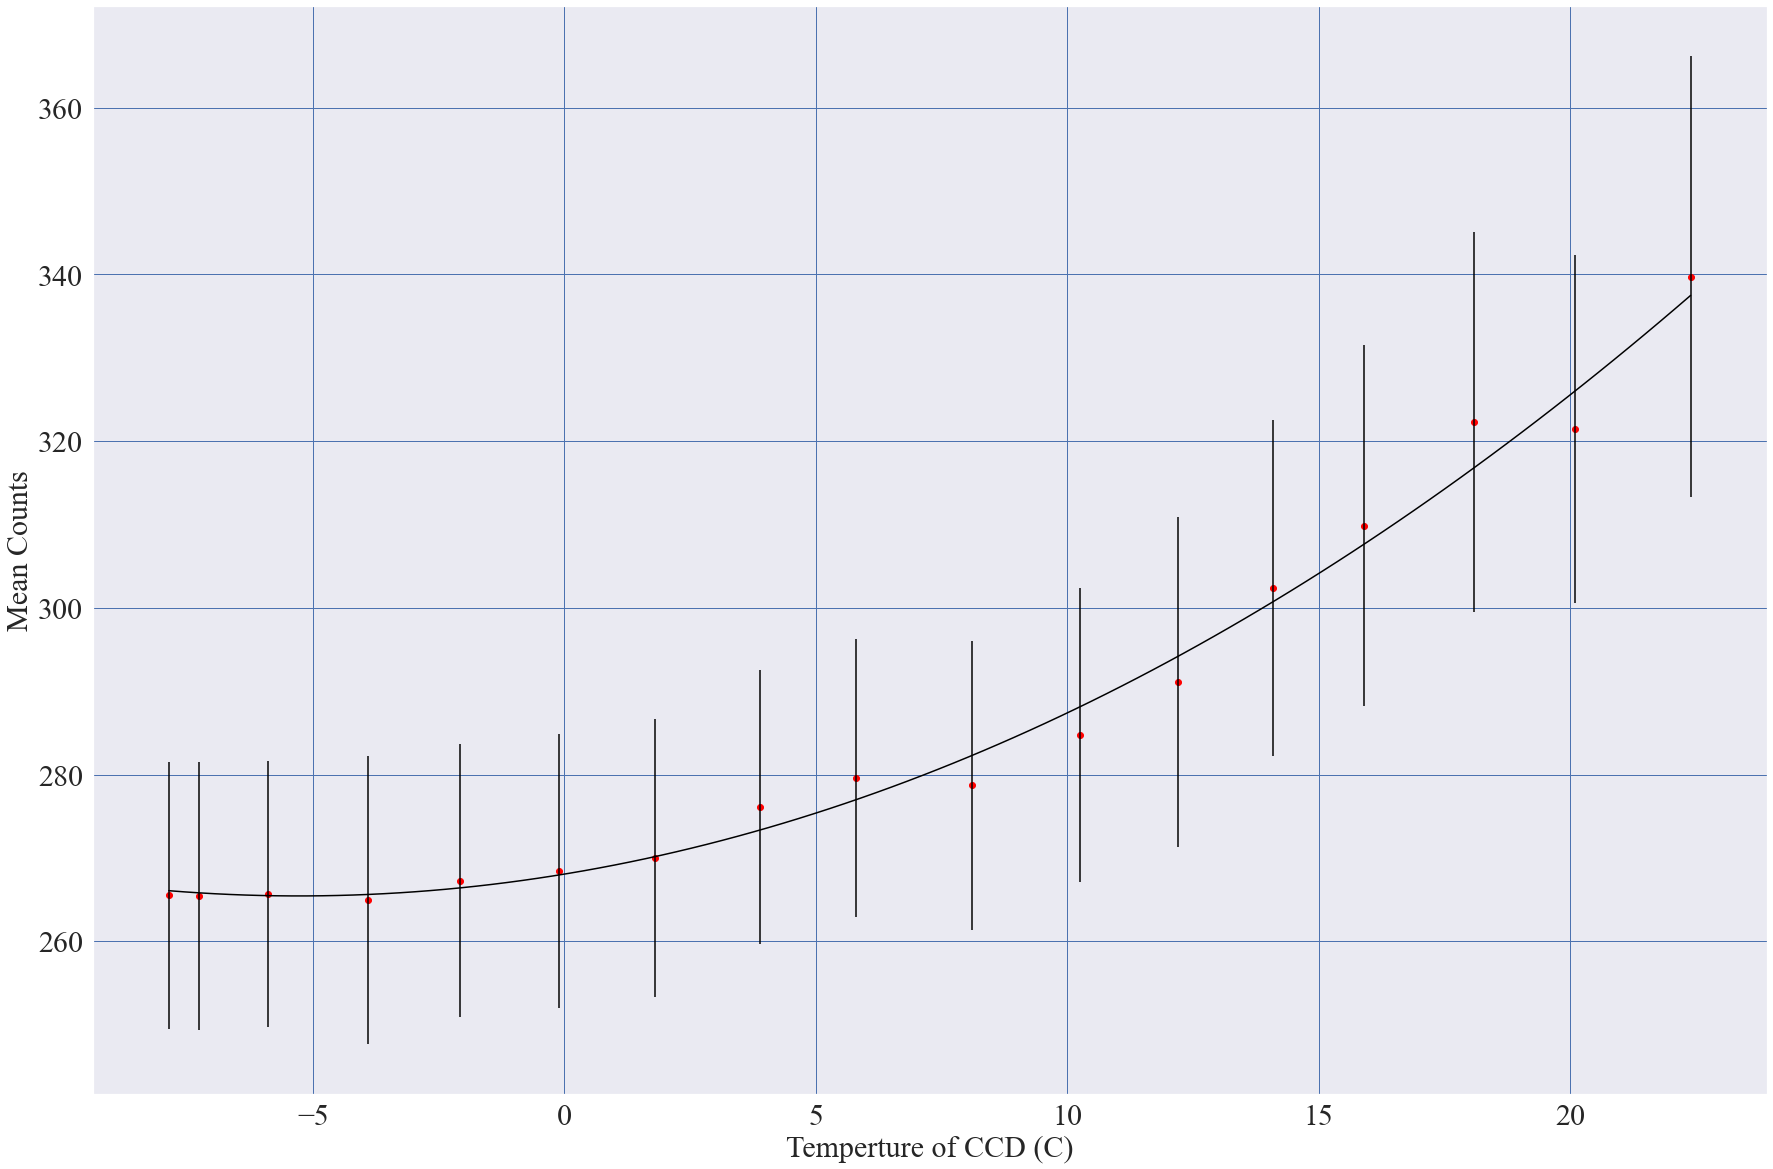

Power_divergenceResult(statistic=0.37574795345158807, pvalue=0.9999999999674192)


<Figure size 2160x1440 with 0 Axes>

In [17]:
# --- data import --- 

os.chdir(r'E:\Dropbox\UCD - Physics Undergrad\3 - Third Year\1. First Semester\PHYC3170 Advanced Labs\2. CCD\Programming')
counts, std, temp = np.loadtxt("temp_dark.dat", unpack = True) # importing data 

# --- data manipulation --- 

def quad_func(T, a_0, a_1, a_2): # defining quadratic function. 
    return a_0 + a_1*T + a_2*(T**2) 

poptbfq, pcovbfq = curve_fit(quad_func, temp, counts, p0 = [1, 2, -.7], sigma = std, absolute_sigma = True)


# --- Data Manpulation for Smooth fit --- 

temp_s = np.linspace(np.amin(temp), np.amax(temp), 100) # using lin space to create 100 points between 0 and the max value of time 
counts_s =  quad_func(np.linspace(np.amin(counts), np.amax(counts), 100), 1, 2, -.7) 


# --- Plotting Graph --- 


plt.scatter(temp, counts, color = 'red')
plt.plot(temp_s, quad_func(temp_s, poptbfq[0], poptbfq[1], poptbfq[2]), color = 'black')

plt.errorbar(temp, counts, xerr = None, yerr = std, ls='none', color = 'black') 
plt.xlabel("Temperture of CCD (C)") 
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.ylabel("Mean Counts")
plt.show()

plt.savefig('countvstemp.png', dpi = 300)

# --- Goodness of fit calculation --- a

print(scipy.stats.chisquare(counts, quad_func(temp, poptbfq[0], poptbfq[1], poptbfq[2])))